In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#import random
%matplotlib inline
from matplotlib import animation
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed
import scipy.integrate as integrate

from matplotlib import animation
from IPython.display import HTML

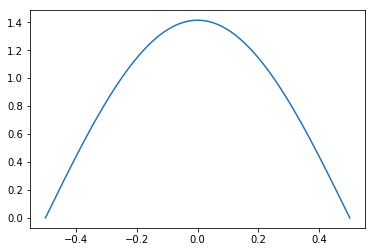

In [14]:
#size of original well
a=1
#size of expanded well
b=2
x_s=500
x1 = np.linspace(-a/2, a/2, x_s)
psi1=np.sqrt(2/a)*np.cos(np.pi*x1/a)
#u1 = np.sqrt(2)*np.cos(np.pi*x)
plt.plot(x1, psi1) 

In [15]:
num=20;
A_n=np.zeros(num)
for i in range(num):
    if i%2 == 0:
        pass
    else:
        A_n[i] = integrate.quad(lambda x: np.sqrt(1/a)*np.cos(np.pi*x/(2*a))*np.sqrt(1/b)*np.cos(i*np.pi*x/(2*b)), -a, a)[0];
        
A_n


array([ 0.        ,  0.84882636,  0.        ,  0.50929582,  0.        ,
        0.12126091,  0.        , -0.05658842,  0.        , -0.03307116,
        0.        ,  0.02176478,  0.        ,  0.01543321,  0.        ,
       -0.01152253,  0.        , -0.00893501,  0.        ,  0.00713299])

In [16]:
A_n**2

array([  0.00000000e+00,   7.20506195e-01,   0.00000000e+00,
         2.59382230e-01,   0.00000000e+00,   1.47042081e-02,
         0.00000000e+00,   3.20224975e-03,   0.00000000e+00,
         1.09370143e-03,   0.00000000e+00,   4.73705585e-04,
         0.00000000e+00,   2.38183866e-04,   0.00000000e+00,
         1.32768693e-04,   0.00000000e+00,   7.98344814e-05,
         0.00000000e+00,   5.08796127e-05])

In [17]:
np.sum(A_n**2)

0.99986395639011982

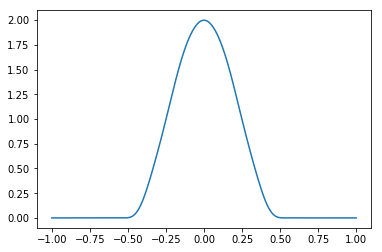

In [6]:
x_s=500
x = np.linspace(-b/2, b/2, x_s)
psi=0*x
t=0

for i in range(num):
    if i%2 == 0:
        pass
    else:
        psi=psi+A_n[i]*np.sqrt(2/b)*np.cos(i*np.pi*x/b)*np.exp(1j*np.pi**2*t*i*i/2/b**2)
        
prob=psi*np.conj(psi)      
plt.plot(x,np.real(prob))

In [7]:
myfigsize=(8,6)

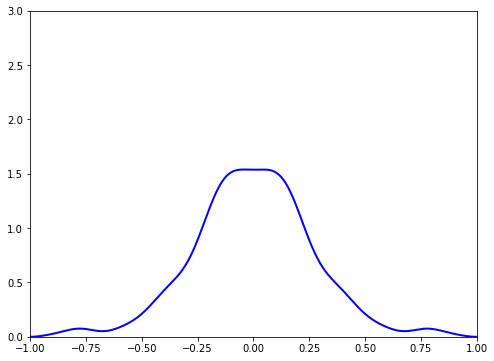

In [8]:
outerlim = b/2
fig = plt.figure(figsize=myfigsize)
ax = plt.axes(xlim=(-outerlim, outerlim), ylim=(0, 3))
line, = ax.plot([], [], lw=2, color='blue')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

x_s=500
tstep=50

def animate(t):
    x = np.linspace(-b/2, b/2, x_s)
    psi=0*x
    for i in range(num):
        if i%2 == 0:
            pass
        else:
            psi=psi+A_n[i]*np.sqrt(2/b)*np.cos(i*np.pi*x/b)*np.exp(1j*np.pi**2*(t/tstep)*i*i/2/b**2)
        
        y=np.real(psi*np.conj(psi) )     

    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)
HTML(ani.to_jshtml())
#ani